<a href="https://colab.research.google.com/github/V1L3La/Learning-An-lise-de-Dados-em-Python/blob/main/Filmes_no_Brasil_2009_2019_An%C3%A1lise_de_Dados_em_Python_Aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Aumentando meu nível

https://www.kaggle.com/joaoavf/introducao-a-analise-de-dados-python-e-pandas

https://insightlab.ufc.br/6-truques-do-pandas-para-impulsionar-sua-analise-de-dados/

https://towardsdatascience.com/cheat-sheet-for-google-colab-63853778c093

Aula 2<br>
https://www.youtube.com/watch?v=2oZHg3HOtcY&t=3243s

10 minutes to pandas<br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html



#### Analizando problemas de dados no Dataframe  
df.shape    # verifica o tamanho do dataframe   (linhas, colunas)<br>
df.dtypes   # todas colunas e os tipos [object(texto ou não sabe o que é)]<br>

*   Item da lista
*   Item da lista


df.describe()<br>
df.info()<br>
df.head(4)<br>
df.sample(10)   #lista linhas aleatórias<br>
df.tail()<br>
df.isnull().sum() retorna o número de valores ausentes para cada coluna.<br>
df.isnull().sum().sum() retorna o número total de valores ausentes.<br>
descobrir a porcentagem de valores que estão faltando, executando: df.isna().mean()<br>
    🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗<br>
help(pd.Series.loc) pedindo ajuda<br>

#Análise de dados de filmes exibidos no Brasil de 2009 a 2019

#####Com base nos dados da Ancine (https://oca.ancine.gov.br) vamos analisar os filmes exibidos no Brasil

Arquivo -> filmes_no_Brasil_2009_2019.xlsx



In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# carrega um dataframe com base no arquivo excel sem as 2 primeiras linhas do titulo e chute as 20 ultimas linhas
df = pd.read_excel('https://github.com/V1L3La/Learning-An-lise-de-Dados-em-Python/blob/main/filmes_no_Brasil_2009_2019.xlsx?raw=true', skiprows=2 ,skipfooter=20)
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


In [3]:
df.shape

(7081, 11)

In [4]:
df.describe()

,Ano de exibição
count,7081.000000
mean,2014.339924
std,3.106327
min,2009.000000
25%,2012.000000
50%,2015.000000
75%,2017.000000
max,2019.000000


In [5]:
df.sample(5)

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
2930,2015,A Série Divergente - Insurgente,E1500121900000,Ficção,Estados Unidos,Estrangeira,42082,Paris,Distribuição Nacional,2819817,3.9037e+07
5599,2011,Do luto à luta,B0500286600000,Documentário,Brasil,Brasileira,38996,Raiz Distribuidora,Distribuição Nacional,8557,25743
1801,2017,Muito Romântico,B1600300000000,Ficção,Brasil,Brasileira,42880,Vitrine Filmes,Distribuição Nacional,1327,8875.72
461,2019,O Parque,E1800137700000,Ficção,França,Estrangeira,43223,Zeta Filmes,Distribuição Nacional,9,70
1078,2018,Morangos Silvestres,E1800119500000,Ficção,Suécia,Estrangeira,Relançamento,F. J. Cines,Distribuição Nacional,494,7073


In [6]:
df.tail()   # nan  = not a number

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
7076,2009,Xuxa Gêmeas,B0600616500000,Ficção,Brasil,Brasileira,39066,Fox,Distribuição Internacional,1671,5013
7077,2009,Zico na Rede,B0901041400000,Documentário,Brasil,Brasileira,39997,Business Telecom,Distribuição Nacional,546,2529.5
7078,2009,À Deriva,B0901015000000,Ficção,"Brasil, Estados Unidos",Brasileira,40025,Universal,Distribuição Internacional,94588,870171
7079,2009,É Proibido Fumar,B0901108700000,Ficção,Brasil,Brasileira,40151,Playarte,Distribuição Nacional,33291,303276
7080,2009,Última Parada - 174,B0800914800000,Ficção,Brasil,Brasileira,39745,Paramount,Distribuição Internacional,2107,8954


In [7]:
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


In [8]:
df.dtypes


Ano de exibição                     int64
Título da obra                     object
CPB/ROE                            object
Gênero                             object
País(es) produtor(es) da obra      object
Nacionalidade da obra              object
Data de lançamento                 object
Empresa distribuidora              object
Origem da empresa distribuidora    object
Público no ano de exibição         object
Renda (R$) no ano de exibição      object
dtype: object

In [9]:
#----1
# Transformar o campo Data de lançamento em data
#df['Data de lançamento'] = pd.to_datetime(df['Data de lançamento'])

In [10]:
#---2
# identificar o problema da coluna Data de lançamento
df['Data de lançamento'].value_counts() 


Relançamento    198
41264            33
42341            33
41607            29
41215            27
               ... 
42112             1
42115             1
39297             1
42126             1
28838             1
Name: Data de lançamento, Length: 878, dtype: int64

In [11]:
#---3
# exibir Data de lançamento  como relançamento
df[df['Data de lançamento'] == 'Relançamento']

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
6,2019,A Bela da Tarde,E1700492900000,Ficção,"França, Itália",Estrangeira,Relançamento,Zeta Filmes,Distribuição Nacional,14,253
278,2019,Gritos e Sussurros,E1600273100000,Ficção,Suécia,Estrangeira,Relançamento,F. J. Cines,Distribuição Nacional,105,1024
359,2019,Matrix,E1500096600000,Ficção,"Austrália, Estados Unidos",Estrangeira,Relançamento,Warner,Distribuição Internacional,18260,277563
390,2019,Morangos Silvestres,E1500804700000,Ficção,Suécia,Estrangeira,Relançamento,F. J. Cines,Distribuição Nacional,129,1230
396,2019,Mulholland Drive - Cidade dos Sonhos,E1700486000000,Ficção,"Estados Unidos, França",Estrangeira,Relançamento,Zeta Filmes,Distribuição Nacional,50,920
...,...,...,...,...,...,...,...,...,...,...,...
6503,2009,A agenda,E1600634500000,Ficção,França,Estrangeira,Relançamento,Imovision,Distribuição Nacional,33,154.5
6738,2009,Fome de Viver,E1600228600000,Ficção,Reino Unido,Estrangeira,Relançamento,Filmes do Estação,Distribuição Nacional,268,944
6917,2009,Os Contos de Canterbury,E1600589800000,Ficção,Itália,Estrangeira,Relançamento,Pandora Filmes,Distribuição Nacional,5026,29614
6965,2009,Ratatouille,E1500365600000,Animação,Estados Unidos,Estrangeira,Relançamento,Sony,Distribuição Internacional,230,2300


#### Decisão sobre dados incorretos/ faltantes/divergentes

apagar?   atualizar manual os dados? o que fazer? Qual decisão?

In [38]:
df.shape

(7081, 11)

In [39]:
#---4
#criar(copia) um novo dataframe sem as linhas Relançamentos (-198 linhas)
df_novo = df[df['Data de lançamento'] != 'Relançamento']
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


In [42]:
# del
df_novo[-5:].T

,7076,7077,7078,7079,7080
Ano de exibição,2009,2009,2009,2009,2009
Título da obra,Xuxa Gêmeas,Zico na Rede,À Deriva,É Proibido Fumar,Última Parada - 174
CPB/ROE,B0600616500000,B0901041400000,B0901015000000,B0901108700000,B0800914800000
Gênero,Ficção,Documentário,Ficção,Ficção,Ficção
País(es) produtor(es) da obra,Brasil,Brasil,"Brasil, Estados Unidos",Brasil,Brasil
Nacionalidade da obra,Brasileira,Brasileira,Brasileira,Brasileira,Brasileira
Data de lançamento,39066,39997,40025,40151,39745
Empresa distribuidora,Fox,Business Telecom,Universal,Playarte,Paramount
Origem da empresa distribuidora,Distribuição Internacional,Distribuição Nacional,Distribuição Internacional,Distribuição Nacional,Distribuição Internacional
Público no ano de exibição,1671,546,94588,33291,2107


In [14]:
df_novo.shape

(6883, 11)

In [15]:
df_novo.dtypes

Ano de exibição                     int64
Título da obra                     object
CPB/ROE                            object
Gênero                             object
País(es) produtor(es) da obra      object
Nacionalidade da obra              object
Data de lançamento                 object
Empresa distribuidora              object
Origem da empresa distribuidora    object
Público no ano de exibição         object
Renda (R$) no ano de exibição      object
dtype: object

In [16]:
#---5
# converter a coluna Data de lançamento para datetime
# df_novo['Data de lançamento'] = pd.to_datetime(df_novo['Data de lançamento'])

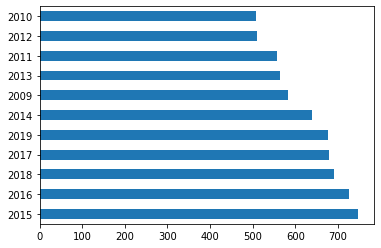

In [17]:
df_novo['Ano de exibição'].value_counts().plot.barh()

In [18]:
df_novo.rename(columns={'Público no ano de exibição': 'Publico'}, inplace = True)   # troca o nome de uma coluna

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
df_novo

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Publico,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531
...,...,...,...,...,...,...,...,...,...,...,...
7076,2009,Xuxa Gêmeas,B0600616500000,Ficção,Brasil,Brasileira,39066,Fox,Distribuição Internacional,1671,5013
7077,2009,Zico na Rede,B0901041400000,Documentário,Brasil,Brasileira,39997,Business Telecom,Distribuição Nacional,546,2529.5
7078,2009,À Deriva,B0901015000000,Ficção,"Brasil, Estados Unidos",Brasileira,40025,Universal,Distribuição Internacional,94588,870171
7079,2009,É Proibido Fumar,B0901108700000,Ficção,Brasil,Brasileira,40151,Playarte,Distribuição Nacional,33291,303276


In [20]:
df_novo['Publico'].sample(25)

4108        520
502        1756
1931         11
920        3951
2113      20134
2026        874
1510       5224
5888         15
2569        970
6078     135270
1867         30
5723      69288
1704    6686736
4878        927
2679         65
1466        211
2384     135194
4718       1975
964          24
3841         52
6353       3995
6640       1092
2081        160
6848       5407
5023       3321
Name: Publico, dtype: object

In [21]:

df_novo[df_novo['Publico'] == 'ND'].value_counts

<bound method DataFrame.value_counts of       Ano de exibição  ... Renda (R$) no ano de exibição
81               2019  ...                            ND
125              2019  ...                            ND
158              2019  ...                            ND
203              2019  ...                            ND
221              2019  ...                            ND
229              2019  ...                            ND
3993             2014  ...                            ND
4116             2014  ...                            ND
4429             2013  ...                            ND
4446             2013  ...                            ND
4491             2013  ...                            ND
4778             2013  ...                            ND
4846             2013  ...                            ND
4989             2012  ...                            ND
5012             2012  ...                            ND
5050             2012  ...                      

In [22]:
df_novo['Publico'].shape

(6883,)

In [23]:
df_novo = df_novo[df_novo['Publico'] != 'ND']
df_novo.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Publico,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


In [24]:
df_novo['Publico'] = pd.to_numeric(df_novo['Publico'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_novo.dtypes

Ano de exibição                     int64
Título da obra                     object
CPB/ROE                            object
Gênero                             object
País(es) produtor(es) da obra      object
Nacionalidade da obra              object
Data de lançamento                 object
Empresa distribuidora              object
Origem da empresa distribuidora    object
Publico                             int64
Renda (R$) no ano de exibição      object
dtype: object

In [26]:
df_novo[df_novo['Publico'] == df_novo['Publico'].max()].head(3)

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Publico,Renda (R$) no ano de exibição
662,2019,Vingadores: Ultimato,E1900107800000,Ficção,Estados Unidos,Estrangeira,43580,Disney,Distribuição Internacional,19656467,338624881


In [27]:
df_novo['Renda (R$) no ano de exibição'].sample(25)

1170          27773
2262            581
5709            478
3300        76074.2
1902        37639.5
4326        92108.6
5757        4044.56
6391    1.29316e+07
2659           8923
3773          24735
140            4358
4633           1526
7034        7497636
2384    2.52286e+06
5914        26376.5
5284         3609.6
3243           2755
5767        25858.7
5502            587
2766        44764.8
3834    3.51807e+07
4958        32029.6
2257        22784.5
1013            450
290           14378
Name: Renda (R$) no ano de exibição, dtype: object

In [28]:

df_novo[df_novo['Renda (R$) no ano de exibição'] == 'ND'].value_counts

<bound method DataFrame.value_counts of Empty DataFrame
Columns: [Ano de exibição, Título da obra, CPB/ROE, Gênero, País(es) produtor(es) da obra, Nacionalidade da obra, Data de lançamento, Empresa distribuidora, Origem da empresa distribuidora, Publico, Renda (R$) no ano de exibição]
Index: []>

In [29]:
df_novo['Renda (R$) no ano de exibição'].shape

(6854,)

In [30]:
df_novo = df_novo[df_novo['Renda (R$) no ano de exibição'] != 'ND']
df_novo.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Publico,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


In [31]:
df_novo['Renda (R$) no ano de exibição'] = pd.to_numeric(df_novo['Renda (R$) no ano de exibição'])

In [32]:
df_novo.dtypes

Ano de exibição                      int64
Título da obra                      object
CPB/ROE                             object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Empresa distribuidora               object
Origem da empresa distribuidora     object
Publico                              int64
Renda (R$) no ano de exibição      float64
dtype: object

In [33]:
df_novo[df_novo['Renda (R$) no ano de exibição'] == df_novo['Renda (R$) no ano de exibição'].max()]

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Publico,Renda (R$) no ano de exibição
662,2019,Vingadores: Ultimato,E1900107800000,Ficção,Estados Unidos,Estrangeira,43580,Disney,Distribuição Internacional,19656467,338624881.0


In [34]:
df_novo[df_novo['Renda (R$) no ano de exibição'] == df_novo['Renda (R$) no ano de exibição'].min()].head(4)

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Publico,Renda (R$) no ano de exibição
849,2018,Colo*,E1700484800000,Ficção,Portugal,Estrangeira,43055,Zeta Filmes,Distribuição Nacional,0,0.0
862,2018,Coragem! As Muitas Vidas do Cardeal Dom Paulo ...,B1700537400000,Documentário,Brasil,Brasileira,43083,TV Meio Ambiente,Distribuição Nacional,0,0.0
996,2018,Jesus - A Esperança*,B1700447200000,Ficção,Brasil,Brasileira,43083,Moro Comunicação,Distribuição Nacional,0,0.0
1030,2018,Macaco Tião - O Candidato do Povo*,B1700051900000,Documentário,Brasil,Brasileira,43083,Pipa Produções,Distribuição Nacional,0,0.0


In [35]:
df_novo['Nacionalidade da obra'].value_counts()


Estrangeira    4753
Brasileira     2101
Name: Nacionalidade da obra, dtype: int64

In [37]:
# Help
df_novo.head()??

SyntaxError: ignored